<a href="https://colab.research.google.com/github/victorm0202/OP-2020-code/blob/master/4)_Taller_Keras_(API).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras API NN's 

**Contenido:**

* Modelos como grafos

* Callbacks (batch normalization. residual conection, hyperparameter optimization, and model ensambling)

* TensorBoard (visualización y monitoreo del entrenamiento)



**Motivación:** 

* Modelo secuencial asume que la red tiene exactamente una entrada y una salida, un *stack* lineal

* Redes puedn tener multiples entrada, salidas o ramas entre capas (grafos)

**Ejemplo:** Suponga que tiene la tarea de predecir le precio más problable de una pieca de ropa de segunda mano, utilizando los siguientes inpus: metadatos (marca, edad, y así), utilizar descripción (texto), e imagenes del producto.

* Si se tiene los metadatos utiliza una capa densa conectada a una red y predices el precio.

* Si se tiene solo el texto utilizas una red recurrento o un !D convnet.
 
* Si se tiene solo la imagen utilizas 2D convnet

**¿Cómo utilizar los tres?** i) entrenar por separado y y hacer un promedio ponderado de los predictores. La iformación puede ser redundante; ii) aprender un modelo donde aprenda de los tres tipos de datos, por medio de tres entradas

Algunos modelos nececitan predecir multiples etiquetas

**Ejemplo:** Dada una novela te gustaría predecir el genero de la novela y la fecha en la que fue escrita.

## Introducción functional API

* Manipulas tensores

* Layers como funciones toman tensores y regresan tensores (por eso, functional API)



In [ ]:
from tensorflow.keras import Input, layers

input_tensor = Input(shape=(32,))            # un tensor

dense = layers.Dense(32, activation='relu')  # layer es una función

output_tensor = dense(input_tensor)          # una layer puede llamar un tensor
                                             # regresando otro tensor

### Modelo Sequential vs functional API

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Input

# Modelo Sequential

modelo_seq = Sequential()
modelo_seq.add(Dense(32, activation = "relu", input_shape = (64,)))
modelo_seq.add(Dense(32, activation = "relu"))
modelo_seq.add(Dense(10, activation = "softmax"))


### Agregando capas con API



* No se hace uso de **add**

* Cada nueva capa usa como entrada la salida de la anteriormente (tamaño se define por el número de unidades).

* Indicar el flujo del tensor:



tensor_salida = layers.Dense(units=num_unidades, 
                                activation = 'funcion_activacion', 
                                input_shape=(*shape*)) (tensor_entrada)

x=layers.Dense(units=32, activation='relu') (input_tensor)
x=layers.Dense(units=32, activation='relu') (x)
output_tensor=layers.Dense(10, activation='softmax') (x)

de forma más explicita

in_tensor=Input(shape=(64,))

x1 = layers.Dense(units = 32, activation = 'relu') (in_tensor)
x2 = layers.Dense(units = 32, activation = 'relu') (x1)
out_tensor=layers.Dense(units=10, activation='softmax') (x2)

* Definir modelo de entrada y salida

model = Model(in_tensor, out_tensor)

Modelo multiple:

model = Model(inputs=[main_input, auxiliary_input], 
               outputs=[main_output, auxiliary_output])

inputs: es el tensor (o lista de tensores) datos

outputs: es el tensor (o lista de tensore) resultados

In [ ]:
# Modelo functionla API

entrada = Input(shape = (64,))
x = Dense(32, activation = "relu")(entrada)
x = Dense(32, activation = "relu")(x)
salida = Dense(10, activation = "softmax")(x)

modelo = Model(entrada, salida)

modelo.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


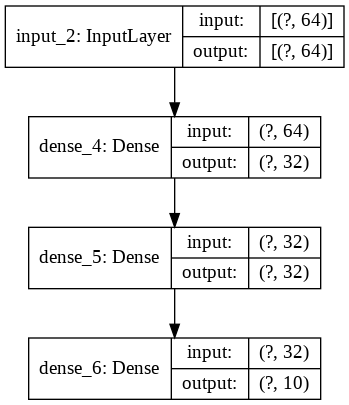

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(modelo, to_file='Taller03_1.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='Taller03_1.png')

### Capas (layers) de operación con multiples entradas y salidas

In [ ]:
tf.keras.layers.s

<module 'tensorflow.keras' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/__init__.py'>

In [ ]:
import tensorflow as tf

x1 = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
x2 = tf.constant([[1.0, 2.0, 3.0], [1.0, 1.0, 1.0]])
# suma de tensores
x =  tf.keras.layers.add([x1,x2])

# resta de tensores
x = tf.keras.layers.subtract([x1,x2])

# concatena tensores
x = tf.keras.layers.concatenate([x1,x2], axis = -1)

# multiplica tensores
x = tf.keras.layers.multiply([x1,x2])

# promedio de  tensores
x = tf.keras.layers.average([x1,x2])

# máximo tensores
x = tf.keras.layers.maximum([x1,x2])

# mínimo tensores
x = tf.keras.layers.minimum([x1,x2])

# prosucto punto tensores
x = tf.keras.layers.dot([x1,x2], axes = -1)

### Capas (layers) repetitivas

In [ ]:
# Modelo functionla API

entrada = Input(shape = (64,))
x = Dense(32, activation = "relu")(entrada)
for i in range(5):
    x = Dense(32, activation = "relu")(x)
    x = Dropout(.5)(x)
    x = Dense(16, activation = "relu")(x)
    x = Dropout(.5)(x)
    
salida = Dense(10, activation = "softmax")(x)

modelo = Model(entrada, salida)

modelo.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

### Ejemplo 1: NN's Keras API

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

input_shape = Input(shape = (28*28,))
x = Dense(512, activation = "relu")(input_shape)
output_tensor = Dense(10, activation ="softmax")(x)

model = Model(input_shape, output_tensor)

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


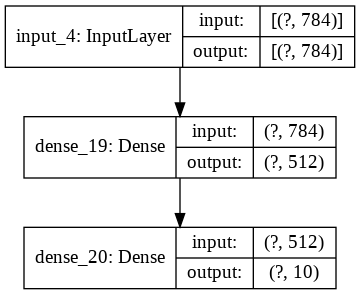

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='TALLER03.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='TALLER03.png')

In [ ]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
import time
tic=time.time()

history = model.fit(train_images, train_labels, epochs=5, 
                 validation_split=0.2, batch_size=128)

print('Tiempo de procesamiento (secs): ', time.time()-tic)

Epoch 1/5
375/375 [==============================] - 4s 10ms/step - loss: 0.2862 - accuracy: 0.9170 - val_loss: 0.1407 - val_accuracy: 0.9591
Epoch 2/5
375/375 [==============================] - 4s 9ms/step - loss: 0.1172 - accuracy: 0.9650 - val_loss: 0.1117 - val_accuracy: 0.9672
Epoch 3/5
375/375 [==============================] - 4s 9ms/step - loss: 0.0761 - accuracy: 0.9766 - val_loss: 0.0898 - val_accuracy: 0.9741
Epoch 4/5
375/375 [==============================] - 3s 9ms/step - loss: 0.0548 - accuracy: 0.9830 - val_loss: 0.0886 - val_accuracy: 0.9731
Epoch 5/5
375/375 [==============================] - 3s 9ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0811 - val_accuracy: 0.9776
Tiempo de procesamiento (secs):  18.36005926132202


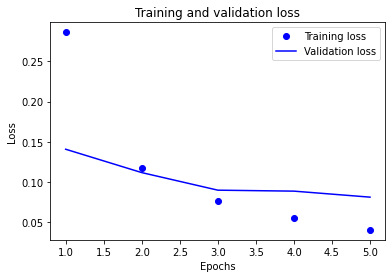

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


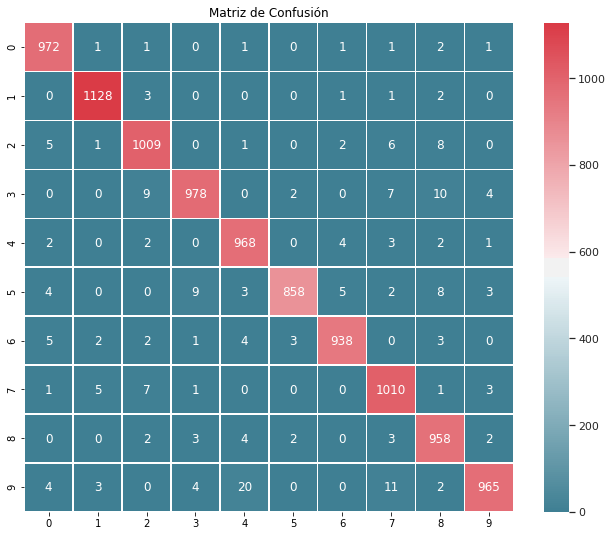

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import numpy as np

classes = model.predict(test_images)

test_true_labels      = np.argmax(test_labels, axis=1)
test_predicted_labels = np.argmax(classes,axis=1)


C = confusion_matrix(test_true_labels, test_predicted_labels)


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Acc:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9784
Acc: 0.9783999919891357


### Ejemplo 2: Multiples entradas

In [ ]:
import tensorflow.keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Dos entradas
input1 = Input(shape=(28*28,))
input2 = Input(shape=(28*28,))

# Layer que une canales
x = tensorflow.keras.layers.concatenate([input1, input2])

# Capa densa (fully connected)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

modelo_multInput = Model(inputs=[input1, input2], 
              outputs=predictions)

modelo_multInput.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


modelo_multInput.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 1568)         0           input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 64)           100416      concatenate_3[0][0]   

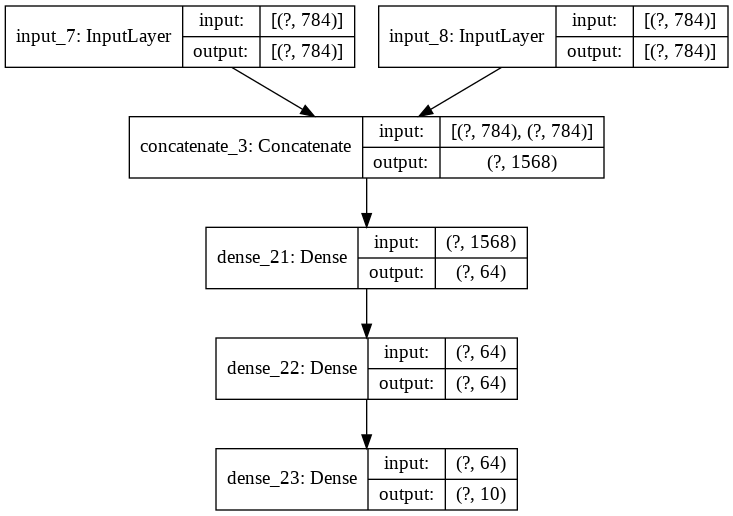

In [ ]:
plot_model(modelo_multInput, to_file='Taller03_2.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='Taller03_2.png')


In [ ]:
import time
tic=time.time()

history = modelo_multInput.fit([train_images,train_images], train_labels, epochs=5, 
                 validation_split=0.2, batch_size=128)

print('Tiempo de procesamiento (secs): ', time.time()-tic)

Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 0.3598 - accuracy: 0.8962 - val_loss: 0.1854 - val_accuracy: 0.9449
Epoch 2/5
375/375 [==============================] - 2s 4ms/step - loss: 0.1639 - accuracy: 0.9520 - val_loss: 0.1471 - val_accuracy: 0.9553
Epoch 3/5
375/375 [==============================] - 2s 4ms/step - loss: 0.1203 - accuracy: 0.9645 - val_loss: 0.1269 - val_accuracy: 0.9623
Epoch 4/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0949 - accuracy: 0.9718 - val_loss: 0.1325 - val_accuracy: 0.9586
Epoch 5/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0790 - accuracy: 0.9759 - val_loss: 0.1029 - val_accuracy: 0.9697
Tiempo de procesamiento (secs):  8.872723817825317


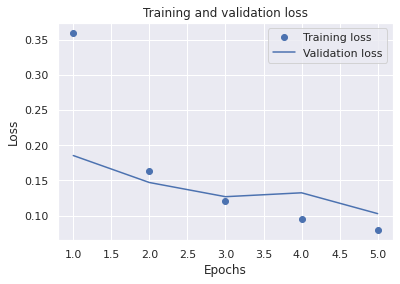

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

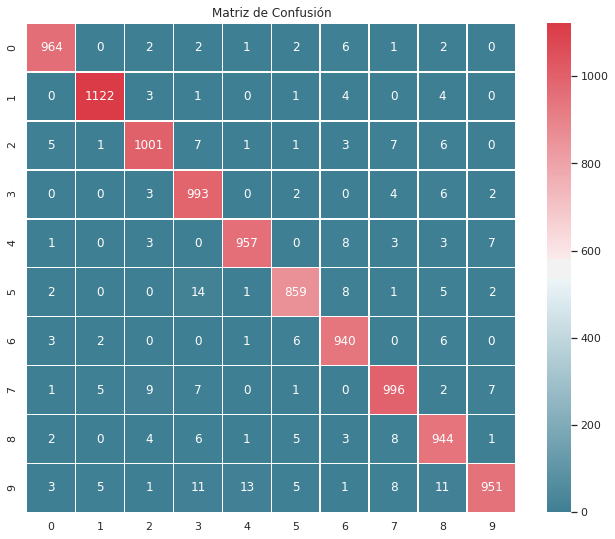

313/313 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9727
Acc: 0.9726999998092651


In [ ]:
classes = modelo_multInput.predict([test_images,test_images])

test_true_labels      = np.argmax(test_labels, axis=1)
test_predicted_labels = np.argmax(classes,axis=1)


C = confusion_matrix(test_true_labels, test_predicted_labels)


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()

test_loss, test_acc = modelo_multInput.evaluate([test_images,test_images], test_labels)
print("Acc:", test_acc)

### Ejemplo 3: Multiples salidas

In [ ]:
import tensorflow.keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Dos entradas
input1 = Input(shape=(28*28,))

# Layer densa en común
x = Dense(64, activation='relu')(input1)

# dos caminos de procesamiento
x2 = Dense(64, activation='relu')(x)                # Densa oculta
predictions1 = Dense(10, activation='softmax', name = "salida1")(x2)  # Densa salida

x3 = Dense(64, activation='relu')(x)                # Densa oculta
predictions2 = Dense(10, activation='softmax', name = "salida2")(x3)  # Densa salida

# Modelo con dos salidas y una entrada
modelo_multOutput = Model(inputs=[input1], 
                          outputs=[predictions1, predictions2], 
                          name='multOutput')

modelo_multOutput.compile(optimizer='rmsprop',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

modelo_multOutput.summary()



Model: "multOutput"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 64)           50240       input_9[0][0]                    
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 64)           4160        dense_24[0][0]                   
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 64)           4160        dense_24[0][0]                   
_________________________________________________________________________________________

* Nota: no simpre se tiene variables categoricas de salida, necesita función de costo adecuada en cada caso

En caso de que quieras predecir metadatos, y categorias:


model.compile(optimizer='rmsprop',
loss=['mse', 'categorical_crossentropy''])

En caso de que nombraras las capas:

model.compile(optimizer='rmsprop',
              loss={'salida1': 'mse',
                    'salida2': 'categorical_crossentropy'})
                    
Se puede pesar conforme relevancia de etiqueta

model.compile(optimizer='rmsprop',
            loss=['mse', 'categorical_crossentropy'],
            loss_weights=[0.25, 10.])
            
model.compile(optimizer='rmsprop',
            loss={'salida1': 'mse',
            'salida2': 'categorical_crossentropy'},
             loss_weights={'salida1': 0.25,
             'salida2': 1.})        

Nota: the resulting loss values are summed into a global loss

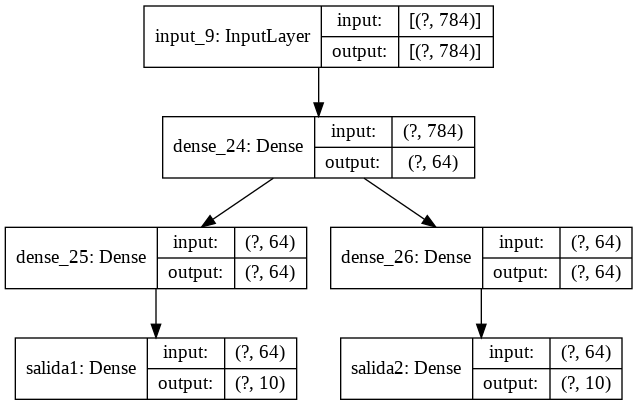

In [ ]:
plot_model(modelo_multOutput, to_file='Taller03_3.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='Taller03_3.png')


In [ ]:
import time
tic=time.time()

history = modelo_multOutput.fit(train_images, [train_labels, train_labels],
                               epochs=5,  validation_split=0.2, batch_size=128)

print('Tiempo de procesamiento (secs): ', time.time()-tic)

Epoch 1/5
375/375 [==============================] - 1s 4ms/step - loss: 0.8593 - salida1_loss: 0.4300 - salida2_loss: 0.4293 - salida1_accuracy: 0.8784 - salida2_accuracy: 0.8806 - val_loss: 0.4335 - val_salida1_loss: 0.2210 - val_salida2_loss: 0.2124 - val_salida1_accuracy: 0.9371 - val_salida2_accuracy: 0.9382
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.4083 - salida1_loss: 0.2082 - salida2_loss: 0.2001 - salida1_accuracy: 0.9388 - salida2_accuracy: 0.9406 - val_loss: 0.3595 - val_salida1_loss: 0.1838 - val_salida2_loss: 0.1757 - val_salida1_accuracy: 0.9459 - val_salida2_accuracy: 0.9470
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.3032 - salida1_loss: 0.1544 - salida2_loss: 0.1488 - salida1_accuracy: 0.9554 - salida2_accuracy: 0.9556 - val_loss: 0.2852 - val_salida1_loss: 0.1475 - val_salida2_loss: 0.1377 - val_salida1_accuracy: 0.9557 - val_salida2_accuracy: 0.9595
Epoch 4/5
375/375 [==============================] - 1s

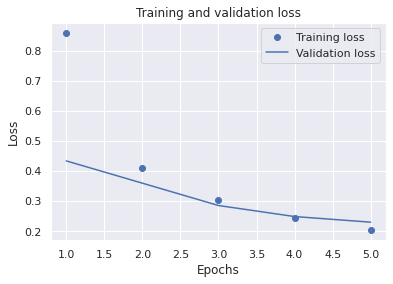

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

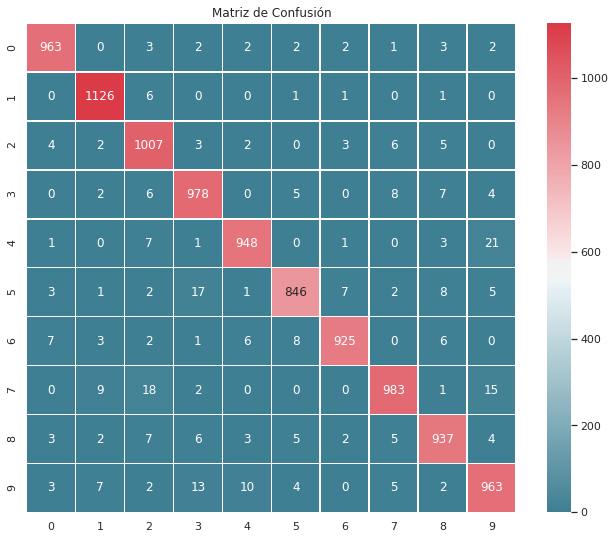

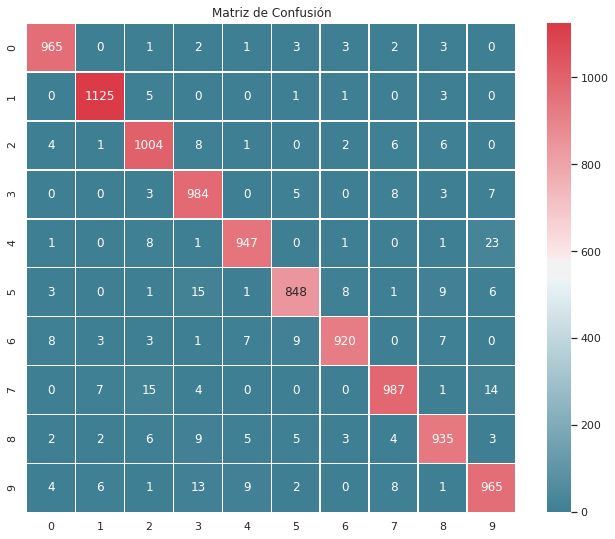

In [ ]:
classes = modelo_multOutput.predict(test_images)

test_true_labels      = np.argmax(test_labels, axis=1)
test_predicted_labels_1 = np.argmax(classes[0],axis=1)
test_predicted_labels_2 = np.argmax(classes[1],axis=1)

C1 = confusion_matrix(test_true_labels, test_predicted_labels_1)
C2 = confusion_matrix(test_true_labels, test_predicted_labels_2)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C1, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C2, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()



In [ ]:
test_loss, test_loss_1,  test_loss_2, test_acc_1, test_acc_2 = modelo_multOutput.evaluate(test_images, [test_labels,test_labels])


313/313 [==============================] - 0s 1ms/step - loss: 0.2176 - salida1_loss: 0.1099 - salida2_loss: 0.1077 - salida1_accuracy: 0.9676 - salida2_accuracy: 0.9680


In [ ]:
print("Acc_1:", test_acc_1)
print("Acc_2:", test_acc_2)

Acc_1: 0.9675999879837036
Acc_2: 0.9679999947547913


### Ejemplo 4: Multiples ramas

In [ ]:
img_dim     = (32, 32, 1,)
img_size    = img_dim[0]*img_dim[1]
num_filters = [64,32,16]
kernel_size = 3

In [ ]:
import tensorflow.keras
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


In [ ]:
# Dos entradas
input1 = Input(shape=img_dim)

# Rama Convolucional de procesamiento

'''
x1 = inputs
for numf in num_filters:
    x1 = Conv2D(filters  = numf, 
               kernel_size = kernel_size, 
               strides     =  2,
               padding     = 'same',
               activation='relu')(x1)
    
shape_before_flattening_x = K.int_shape(x1)
x1=Flatten()(x1)
x1out = Dense(units=16, activation='relu')(x1)

'''
# Rama 2 Densa de procesamiento
x1    = Flatten()(input1)
x1out = Dense(units=16, activation='relu')(x1)
shape_x1out = K.int_shape(x1out) # Returns the shape of tensor or variable as a tuple of int or None entries.

# Rama 2 Densa de procesamiento
x2    = Flatten()(input1)
x2    = Dense(units=48, activation='relu')(x2)
x2out = Dense(units=16, activation='relu')(x2)
shape_x2out = K.int_shape(x2out)

# Rama 2 Densa de procesamiento
x3    = Flatten()(input1)
x3    = Dense(units=64, activation='relu')(x3)
x3    = Dense(units=32, activation='relu')(x3)
x3out = Dense(units=16, activation='relu')(x3)
shape_x2out = K.int_shape(x3out)

# capa de union de ramas de procesamiento
x12 = tensorflow.keras.layers.concatenate([x1out, x2out, x3out])

y = Dense(10, activation='softmax')(x12)

model_multipleBranch = Model(inputs=[input1], 
                          outputs=[y], 
                          name='multiOut')

model_multipleBranch.compile(optimizer='rmsprop',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])


model_multipleBranch.summary()

Model: "multiOut"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
flatten_8 (Flatten)             (None, 1024)         0           input_12[0][0]                   
__________________________________________________________________________________________________
flatten_7 (Flatten)             (None, 1024)         0           input_12[0][0]                   
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 64)           65600       flatten_8[0][0]                  
___________________________________________________________________________________________

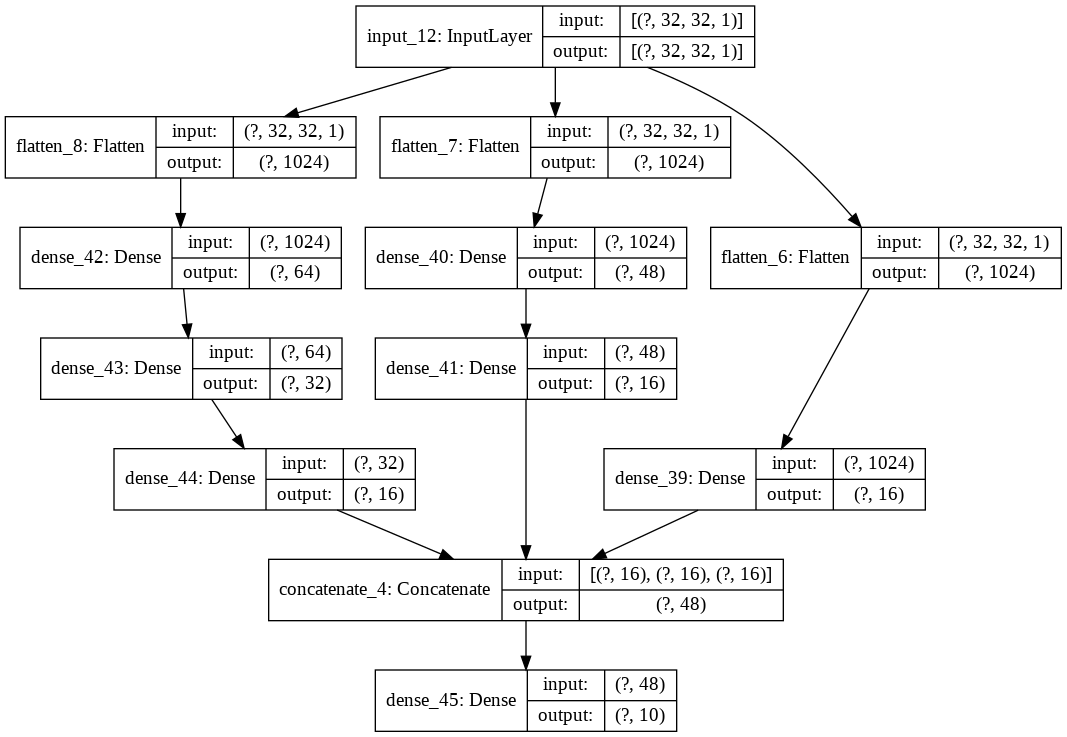

In [ ]:
# Visualización 
from keras.utils import plot_model
plot_model(model_multipleBranch, to_file='Taller03_4.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='Taller03_4.png')

**Nota:** Using the abstract Keras backend to write new code

If you want the Keras modules you write to be compatible with both Theano (th) and TensorFlow (tf), you have to write them via the abstract Keras backend API. Here's an intro.

You can import the backend module via:

from keras import backend as K

ver: https://keras.io/backend/

# Referencias recomendadas

CNNs: https://nbviewer.jupyter.org/github/hairo1421/TallerKeras/blob/master/02%20-%20Taller%20Keras%20Convnets%20%28CNN%27s%29.ipynb

Hyperparameters and regularization : https://nbviewer.jupyter.org/github/hairo1421/TallerKeras/blob/master/04%20-%20Taller%20Regularizaci%C3%B3n.ipynb

The Sequential model: https://www.tensorflow.org/guide/keras/sequential_model

Guia inicial para expertos : https://www.tensorflow.org/tutorials/quickstart/advanced?hl=es-419

Basic classification: Classify images of clothing: https://www.tensorflow.org/tutorials/keras/classification

Basic text classification: https://www.tensorflow.org/tutorials/keras/text_classification

Basic regression: Predict fuel efficiency: https://www.tensorflow.org/tutorials/keras/regression


Overfit and underfit: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

Introduction to Keras Tuner: https://www.tensorflow.org/tutorials/keras/keras_tuner

Distributed training with Keras: https://www.tensorflow.org/tutorials/distribute/keras


Eager execution: https://www.tensorflow.org/guide/eager

Eager Execution in TensorFlow : A more Pythonic way of building models: https://medium.com/coding-blocks/eager-execution-in-tensorflow-a-more-pythonic-way-of-building-models-e461810618c8

Automatically upgrade code to TensorFlow 2: https://www.tensorflow.org/guide/upgrade

